# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [2]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import panel as pn
import plotly.express as px
from pathlib import Path
from dotenv import load_dotenv

# Initialize the Panel Extensions (for Plotly)
pn.extension('plotly')

In [3]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("MAPBOX")

# Import Data

In [5]:
# Import the CSVs to Pandas DataFrames
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")

file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)

- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [6]:
# Define Panel Visualization Functions
def housing_units_per_year():
    mean_housing_units = sfo_data["housing_units"].groupby(sfo_data.index).mean()
    
    housing_unitsmin = min(mean_housing_units)
    housing_unitsmax = max(mean_housing_units)


    mean_housing_units.plot.bar(ylim =(housing_unitsmin, housing_unitsmax+3500),title="Housing Units in SanFran from 2010 to 2016", x="year",y="housing_units")

    plt.close("mean_housing_units")
    
    # YOUR CODE HERE!
    return mean_housing_units
#pn.pane.Matplotlib(mean_housing_units, tight=True)

def average_gross_rent():
    avg_gr_sppsf = (sfo_data[["sale_price_sqr_foot", "gross_rent"]].groupby(sfo_data.index).mean())
    
    avg_gr_sppsf["gross_rent"].plot.line(title="Average Goss Rent per Year")

    return avg_gr_sppsf
#pn.pane.Matplotlib(avg_gr_sppsf, tight=True)
    # YOUR CODE HERE!


def average_sales_price():
    avg_gr_sppsf = (sfo_data[["sale_price_sqr_foot", "gross_rent"]].groupby(sfo_data.index).mean())
    
    avg_gr_sppsf["sale_price_sqr_foot"].plot.line(title="Average Goss Rent per Year")
    
    return avg_gr_sppsf
#pn.pane.Matplotlib(avg_gr_sppf, tight = True)
    
    
    # YOUR CODE HERE!


def average_price_by_neighborhood():
   
    df_mv = sfo_data.groupby([sfo_data.index, "neighborhood"]).mean()
    df_mv.reset_index(inplace=True)
    df_mv.hvplot.line("year","sale_price_sqr_foot",xlabel="Year",ylabel="Avg. Sale Price per Square Foot",groupby="neighborhood",)
    
    return df_mv
    # YOUR CODE HERE!


def top_most_expensive_neighborhoods():
    expensive_neighborhoods = sfo_data.groupby(by="neighborhood").mean()
    expensive_neighborhoods = expensive_neighborhoods.sort_values(by="sale_price_sqr_foot", ascending=False).head(10)
    expensive_neighborhoods = expensive_neighborhoods.reset_index()
    expensive_neighborhoods.hvplot.bar(x="neighborhood",y = "sale_price_sqr_foot", xlabel = "Neighborhoods", ylabel = "Sale Price per Square Foot",title = "Top 10 Most Expensive Neighborhoods in San Francisco", rot=90, height =500)
    
    return expensive_neighborhoods

    # YOUR CODE HERE!


def parallel_coordinates():
    
    expensive_neighborhoods = sfo_data.groupby(by="neighborhood").mean()
    expensive_neighborhoods = expensive_neighborhoods.sort_values(by="sale_price_sqr_foot", ascending=False).head(10)
    expensive_neighborhoods = expensive_neighborhoods.reset_index()
    parallel_coordinates=px.parallel_coordinates(expensive_neighborhoods, color='sale_price_sqr_foot')
    
    return parallel_coordinates
    # YOUR CODE HERE!


def parallel_categories():
    
    expensive_neighborhoods = sfo_data.groupby(by="neighborhood").mean()
    expensive_neighborhoods = expensive_neighborhoods.sort_values(by="sale_price_sqr_foot", ascending=False).head(10)
    expensive_neighborhoods = expensive_neighborhoods.reset_index()
    parallel_categories=px.parallel_categories(expensive_neighborhoods, color='sale_price_sqr_foot')
    
    return parallel_categories
    # YOUR CODE HERE!


def neighborhood_map():
    avg_price_neighborhoods = sfo_data.groupby(by="neighborhood").mean()
    avg_price_neighborhoods = avg_price_neighborhoods.reset_index()
    avg_price_neighborhoods.drop(columns=["neighborhood"], inplace = True)
    df_neighborhood = pd.concat([df_neighborhood_locations,avg_price_neighborhoods],axis="columns", join="inner")
    map = px.scatter_mapbox(
                df_neighborhood,
                lat="Lat",
                lon="Lon",
                size="sale_price_sqr_foot",
                color="gross_rent",
                color_continuous_scale=px.colors.cyclical.IceFire,
                hover_name="Neighborhood",
                zoom=4)
    
    plotly_panel = pn.pane.Plotly(map)
    
    return plotly_panel
    # YOUR CODE HERE!



Tabs
    [0] Column
        [0] Plotly(Figure)
    [1] Row
        [0] DataFrame(Series)
        [1] DataFrame(DataFrame)
        [2] DataFrame(DataFrame)
    [2] Column
        [0] DataFrame(DataFrame)
        [1] DataFrame(DataFrame)
    [3] Column(width=960)
        [0] Plotly(Figure)
        [1] Plotly(Figure)

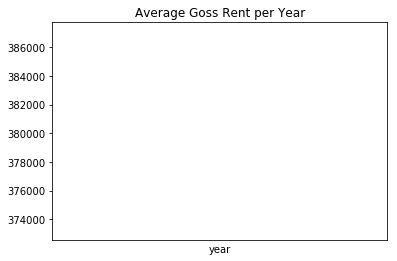

In [9]:


# Create a tab layout for the dashboard
DashboardSF = pn.Tabs(
    ("San Franscico Neighborhoods", pn.Column(neighborhood_map())),
    ("Yearly Analysis", pn.Row(housing_units_per_year(), average_gross_rent(), average_sales_price())),
    ("Neighborhood Analysis", pn.Column(average_price_by_neighborhood(), top_most_expensive_neighborhoods())),
    ("Parallel Plots Analysis",pn.Column(parallel_coordinates(), parallel_categories(), width=960),
    ),
)
DashboardSF

## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

## Serve the Panel Dashboard

In [10]:
DashboardSF.servable()

Tabs
    [0] Column
        [0] Plotly(Figure)
    [1] Row
        [0] DataFrame(Series)
        [1] DataFrame(DataFrame)
        [2] DataFrame(DataFrame)
    [2] Column
        [0] DataFrame(DataFrame)
        [1] DataFrame(DataFrame)
    [3] Column(width=960)
        [0] Plotly(Figure)
        [1] Plotly(Figure)